# KLIFS structures with mutated pockets

Explore KLIFS structures with mutations in their pocket:
- Number of structures with mutations
- Distribution of number of mutations per structure
- Number of mutations per KLIFS pocket position
- Type of mutations
- Type of mutations per KLIFS position

In [1]:
import pandas as pd
from opencadd.databases.klifs import setup_remote

In [2]:
klifs_session = setup_remote()

## Structures

In [3]:
structures = klifs_session.structures.all_structures()

In [4]:
structures.shape

(12572, 46)

## Kinases

In [5]:
kinases_short = klifs_session.kinases.all_kinases()

In [6]:
kinases = klifs_session.kinases.by_kinase_klifs_id(kinases_short["kinase.klifs_id"].to_list())

## Structure and kinase pocket sequence

In [7]:
structure_kinase_sequence = pd.merge(
    structures[["structure.klifs_id", "kinase.klifs_id", "kinase.klifs_name", "structure.pocket"]],
    kinases[["kinase.klifs_id", "kinase.pocket"]],
)

## Mutations in pockets

In [8]:
def get_mutations(structure_seq, kinase_seq):

    sequences = pd.DataFrame(
        [list(structure_seq), list(kinase_seq)], index=["structure", "kinase"]
    ).transpose()
    sequences.index = sequences.index + 1
    sequences = sequences[sequences.apply(lambda x: x["structure"] != "_", axis=1)]
    sequences = sequences[sequences.apply(lambda x: x["kinase"] != "-", axis=1)]

    mutations = sequences[sequences.apply(lambda x: x["structure"] != x["kinase"], axis=1)]
    return mutations

In [9]:
%%time

print(f"Number of structures to iterate over: {structure_kinase_sequence.shape[0]}")
mutated_residues = []
for structure_klifs_id, structure in structure_kinase_sequence.set_index(
    "structure.klifs_id"
).iterrows():
    mutations = get_mutations(structure["structure.pocket"], structure["kinase.pocket"])
    mutations["structure_klifs_id"] = structure_klifs_id
    if mutations.shape[0] > 0:
        mutated_residues.append(mutations)

mutated_residues = pd.concat(mutated_residues)
mutated_residues.index.name = "residue_klifs_id"
mutated_residues = mutated_residues.reset_index()
mutated_residues = mutated_residues.set_index(["structure_klifs_id", "residue_klifs_id"])
mutated_residues

Number of structures to iterate over: 12572
CPU times: user 59.2 s, sys: 2.14 ms, total: 59.2 s
Wall time: 59.1 s


structure kinase
structure_klifs_id residue_klifs_id                 
9869               25                       S      N
9868               25                       S      N
3276               63                       H      R
3275               63                       H      R
13042              63                       H      R
...                                       ...    ...
9070               54                       R      D
                   55                       D      Q
                   56                       Q      L
                   57                       L      G
                   58                       G      R

[7390 rows x 2 columns]

### Number of structures with mutations

In [10]:
structure_klifs_ids_with_mutation = mutated_residues.index.get_level_values(0).unique()
print(f"Number of structures with mutations: {len(structure_klifs_ids_with_mutation)}")

Number of structures with mutations: 1843


### Distribution of number of mutations per structure

In [11]:
n_mutations_per_structure = mutated_residues.groupby("structure_klifs_id").size()

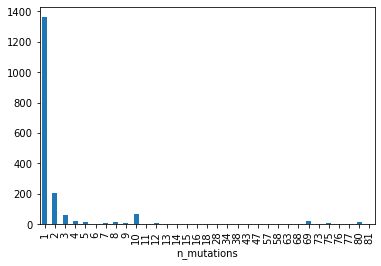

In [12]:
n_structures_mutations = n_mutations_per_structure.value_counts()
n_structures_mutations.name = "n_structures"
n_structures_mutations.index.name = "n_mutations"
n_structures_mutations = n_structures_mutations.sort_index().squeeze()

n_structures_mutations.plot(kind="bar");

### Number of mutations per KLIFS pocket position

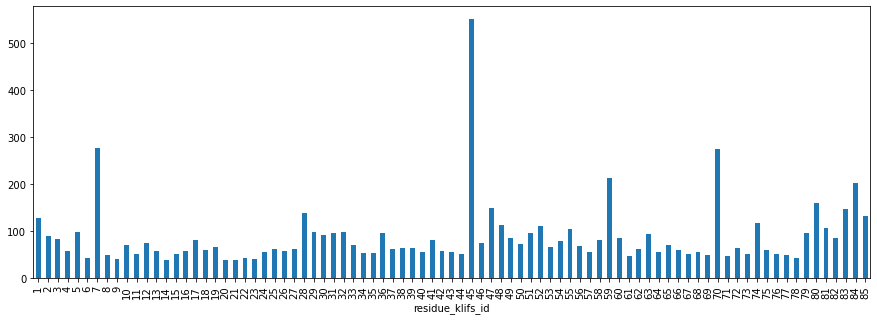

In [13]:
n_mutations_per_residue = mutated_residues.reset_index()["residue_klifs_id"].value_counts()
n_mutations_per_residue.name = "n_structures"
n_mutations_per_residue.index.name = "residue_klifs_id"
n_mutations_per_residue = n_mutations_per_residue.sort_index().squeeze()

n_mutations_per_residue.plot(kind="bar", figsize=(15, 5));

### Type of mutations

In [14]:
mutated_residues.groupby(["structure", "kinase"]).size().sort_values(ascending=False).head(30)

structure  kinase
M          T         343
A          C         237
N          D         204
R          L         133
L          V         117
S          G         108
I          V          95
A          I          93
L          K          91
R          K          89
L          M          86
F          Y          84
I          L          83
D          L          78
L          Y          77
S          C          77
M          L          74
A          S          69
F          L          69
L          N          64
N          L          63
S          A          62
K          L          62
           S          62
A          D          60
L          F          58
           D          57
D          N          56
V          L          55
I          A          55
dtype: int64

### Type of mutations per KLIFS position

In [15]:
mutated_residues.reset_index().groupby(
    ["residue_klifs_id", "structure", "kinase"]
).size().sort_values(ascending=False).head(30)

residue_klifs_id  structure  kinase
45                M          T         343
70                N          D         190
7                 A          C         185
84                R          L          83
59                A          I          74
17                R          K          46
45                M          L          44
31                L          K          42
84                I          F          42
81                D          N          42
80                S          G          42
79                L          T          42
32                S          L          42
83                G          P          42
30                K          S          42
29                S          M          42
85                S          I          42
80                A          S          39
36                I          V          39
48                A          C          39
52                S          E          39
70                A          D          39
28                